
# **Mounting My drive**
---



In [80]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Table Of Contents**
*   Importing libraries
*   Data Collection
*   Data Preprocessing And Cleaning
*   Normalization/Scaling
*   Reshaping
*   Data Splitting
*  Data Augmentation
*  Model Training
      * Convutional Neural Network
      * **My CNN Architecture is :- [[[[conv-->relu]*2]-->MaxPool-->DropOut]*2-->Flatten-->Dense-->Dropout-->Dense]**
*  Loss History
*   Model Evaluation        




# **importing all the important libraries**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools



# **Data Collection**

In [82]:
train_data=pd.read_csv('/content/drive/My Drive/fashion-mnist_train.csv')
test_data=pd.read_csv('/content/drive/My Drive/fashion-mnist_test.csv')

In [83]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# **Here the test data also have the label wo we drop the label column from the test_data**

In [85]:
test=test_data.drop('label',axis=1)
true_label=test_data['label']

# **shape of train data**

In [86]:
train_data.shape

(60000, 785)

In [87]:
test.shape

(10000, 784)

# **Checking if we have any null values or not**

In [88]:
train_data.isnull().any().value_counts() # we don't have  any null values

False    785
dtype: int64

In [89]:
test.isnull().any().value_counts() # we don't have  any null values

False    784
dtype: int64

# **Dependent and Independent variables for training tha data**

In [90]:
X=train_data.drop('label',axis=1)
y=train_data['label']

In [91]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [92]:
y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

# **let's count the no of values for each label. this will help us to understand whether our dataset is balanced or imbalanced.**

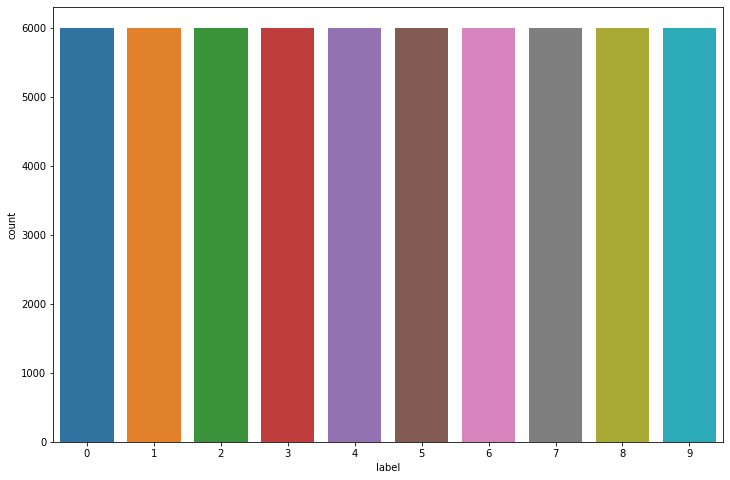

In [93]:
plt.figure(figsize=(12,8))
sns.countplot(y)

#We ca see that all the labels have equal no of datapoints so it is a balanced dataset

In [94]:
X.max()

pixel1       16
pixel2       36
pixel3      226
pixel4      164
pixel5      227
           ... 
pixel780    255
pixel781    255
pixel782    255
pixel783    255
pixel784    170
Length: 784, dtype: int64

# **We can see that our values are between 0 to 255 so we will scale it to 0 to 1 as it is easier for CNN to train on 0 to 1**

In [95]:
#scaling: we can also use different scaler like MinMaxScaler or StandardScaler
X=X/255.0 
test=test/255.0

In [96]:
X.shape

(60000, 784)

# **Reshaping the data**

In [97]:
X=X.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [98]:
print('shape of X',X.shape)
print('shape of y',y.shape)
print('test data shape',test.shape)

shape of X (60000, 28, 28, 1)
shape of y (60000,)
test data shape (10000, 28, 28, 1)


In [99]:
y.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

# **As we can see that y values are numbers like 1,2,3.... so if we feed this into the neural network then network will assume it as a continous values so we have to convert this into a categorical variables**

In [100]:
from tensorflow.keras.utils import to_categorical

In [101]:
y_train=to_categorical(y,num_classes=10)


In [102]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [103]:
y_train.shape

(60000, 10)

# **Splitting of train data**

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.1, random_state=42)
print('training size',X_train.shape,y_train.shape)
print('test size',X_test.shape,y_test.shape)

training size (54000, 28, 28, 1) (54000, 10)
test size (6000, 28, 28, 1) (6000, 10)


# **Data Augmentation(to expand the number of training dataset)**

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [107]:
image_gen=ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False, 
                            fill_mode='nearest')
image_gen.fit(X_train)

# **Model Building**


In [108]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [109]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [110]:
import tensorflow as tf
import datetime, os

In [111]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

# **Adding EarlyStopping to prevent overfitting**

In [115]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)


In [116]:
my_model= model.fit_generator(image_gen.flow(X_train,y_train, batch_size=16),epochs = 16, validation_data = (X_test,y_test),callbacks=[early_stop])

Epoch 1/16
3375/3375 [==============================] - 53s 16ms/step - loss: 0.6666 - accuracy: 0.7503 - val_loss: 0.4108 - val_accuracy: 0.8408
Epoch 2/16
3375/3375 [==============================] - 53s 16ms/step - loss: 0.4948 - accuracy: 0.8143 - val_loss: 0.3591 - val_accuracy: 0.8632
Epoch 3/16
3375/3375 [==============================] - 52s 16ms/step - loss: 0.4441 - accuracy: 0.8330 - val_loss: 0.3046 - val_accuracy: 0.8852
Epoch 4/16
3375/3375 [==============================] - 52s 16ms/step - loss: 0.4215 - accuracy: 0.8438 - val_loss: 0.2972 - val_accuracy: 0.8895
Epoch 5/16
3375/3375 [==============================] - 53s 16ms/step - loss: 0.4027 - accuracy: 0.8505 - val_loss: 0.2745 - val_accuracy: 0.8955
Epoch 6/16
3375/3375 [==============================] - 53s 16ms/step - loss: 0.3875 - accuracy: 0.8550 - val_loss: 0.2847 - val_accuracy: 0.8898
Epoch 7/16
3375/3375 [==============================] - 52s 15ms/step - loss: 0.3811 - accuracy: 0.8585 - val_loss: 0.2673 -

In [117]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print('loss is %0.4f and accuracy is %1.4f'%(loss,accuracy))

loss is 0.2680 and accuracy is 0.9008


In [118]:
metrics=pd.DataFrame(model.history.history)

In [119]:
metrics

,val_loss,val_accuracy,loss,accuracy
0,0.410753,0.840833,0.666571,0.750259
1,0.359069,0.863167,0.494818,0.814296
2,0.304583,0.885167,0.444056,0.833019
3,0.297244,0.889500,0.421472,0.843796
4,0.274479,0.895500,0.402731,0.850537
5,0.284728,0.889833,0.387452,0.855000
6,0.267328,0.899833,0.381100,0.858481
7,0.270039,0.899167,0.377536,0.861241
8,0.268005,0.900833,0.381746,0.860444


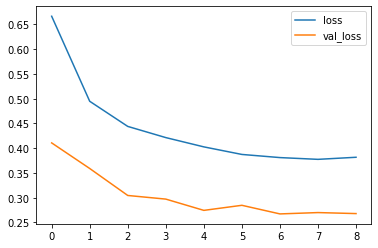

In [120]:
metrics[['loss','val_loss']].plot()

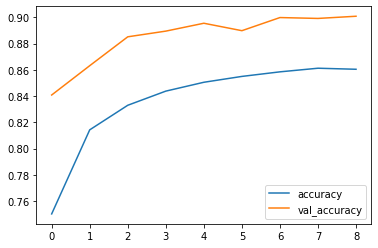

In [121]:
metrics[['accuracy','val_accuracy']].plot()

In [122]:
from sklearn.metrics import classification_report,confusion_matrix


In [123]:
pred=model.predict_classes(test)

In [124]:
print(classification_report(pred,true_label))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1130
           1       0.99      0.99      0.99      1001
           2       0.86      0.86      0.86      1003
           3       0.93      0.90      0.92      1035
           4       0.84      0.84      0.84      1001
           5       0.99      0.96      0.97      1029
           6       0.62      0.75      0.68       824
           7       0.92      0.97      0.94       945
           8       0.98      0.98      0.98       998
           9       0.98      0.95      0.96      1034

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [125]:
confusion_matrix(pred,true_label)

array([[900,   0,  14,  19,   1,   0, 196,   0,   0,   0],
       [  2, 988,   0,   6,   1,   0,   4,   0,   0,   0],
       [ 10,   0, 864,   2,  53,   0,  72,   0,   2,   0],
       [ 21,  12,  15, 933,  29,   0,  24,   0,   1,   0],
       [  2,   0,  57,  19, 840,   0,  81,   0,   2,   0],
       [  0,   0,   1,   0,   0, 986,   0,  34,   6,   2],
       [ 56,   0,  49,  21,  75,   0, 619,   0,   4,   0],
       [  0,   0,   0,   0,   0,   8,   0, 919,   1,  17],
       [  9,   0,   0,   0,   1,   1,   4,   0, 983,   0],
       [  0,   0,   0,   0,   0,   5,   0,  47,   1, 981]])

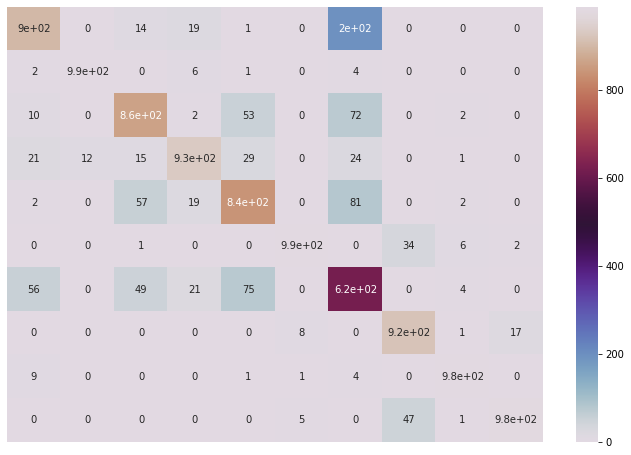

In [126]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(pred,true_label),annot=True,cmap='twilight',xticklabels=False,yticklabels=False)